In [1]:
#Importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import uniform, randint

In [2]:
# Loading dataset
redWine = pd.read_csv("D:\Y1S2\ML\ML Lab 2\winequality-red.csv",sep=';')
whiteWine = pd.read_csv("D:\Y1S2\ML\ML Lab 2\winequality-white.csv",sep=';')

##### Data Preprocessing

In [3]:
#Addding a 'wine_type' column to each dataset to identify the type of wine
redWine['wine_type'] = 1
whiteWine['wine_type'] = 0

In [4]:
#Merging two dataset
wine = pd.concat([redWine,whiteWine])
#show first 5 line of wine dataset
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0            7.4              0.70         0.00             1.9      0.076  \
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                 11.0                  34.0   0.9978  3.51       0.56  \
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  wine_type  
0      9.4        5          1  
1      9.8        5          1  
2      9.8        5          1  
3      9.8        6          1  
4      9.4        5          1

In [5]:
#Split the dataset into features(x) and target variable(y)
x = wine.drop('wine_type', axis=1)
y = wine['wine_type']

In [6]:
#Information about the wime data columns
wine.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [7]:
#To check null value for red wine dataset
print("Checking null value in dataset:")
wine.isnull().sum()


Checking null value in dataset:


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

In [8]:
#Description of the dataset
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar   
count    6497.000000       6497.000000  6497.000000     6497.000000  \
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density   
count  6497.000000          6497.000000           6497.000000  6497.000000  \
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality    wine_type  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378     0.246114  
std       0.160787     0.148806     1.192712     0.873255     0.430779  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     0.000000  
50%       3.210000     0.510000    10.300000     6.000000     0.000000  
75%       3.320000     0.600000    11.300000     6.000000     0.000000  
max       4.010000     2.000000    14.900000     9.000000     1.000000

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#Compute the correlation matrix
correlation_matrix = wine.corr()

# Create a heatmap using the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1200x1000 with 0 Axes>

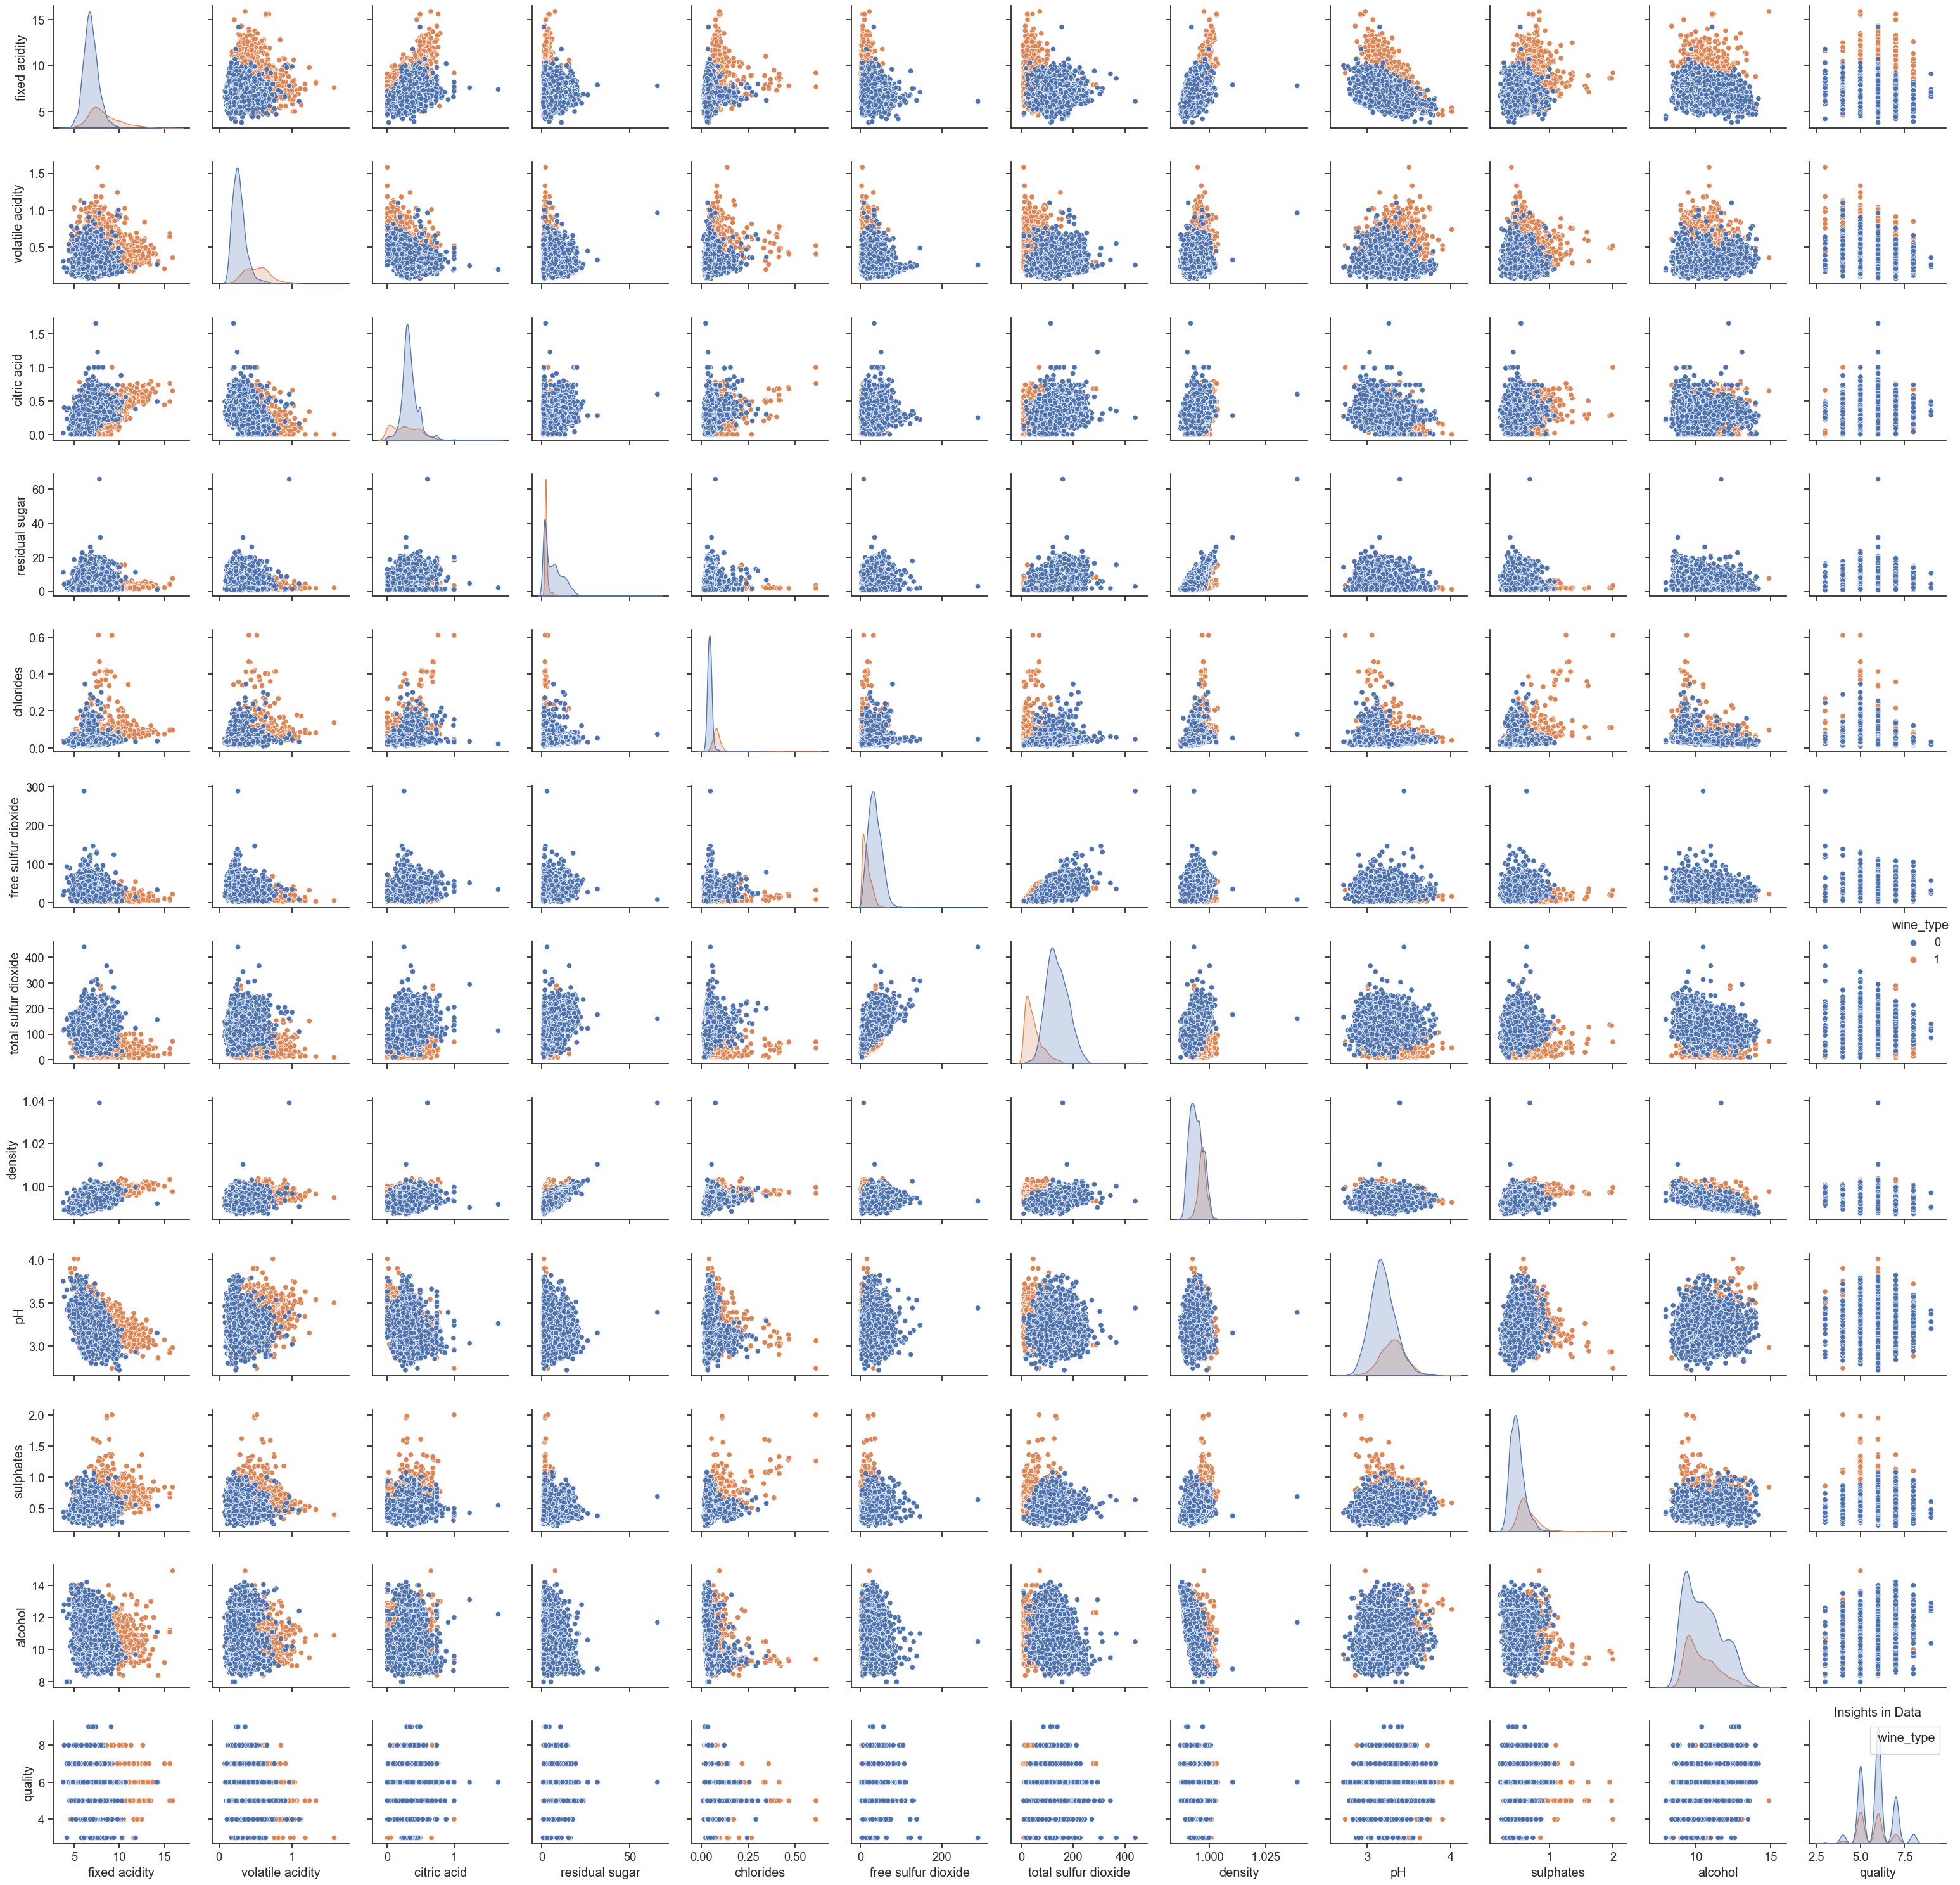

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style and size for plot
sns.set(style = "ticks", font_scale=1.2)
plt.figure(figsize = (12,10))

# Create pairplot
sns.pairplot(wine, hue="wine_type")

# Set plot title and legend
plt.title("Insights in Data")
plt.legend(title = " wine_type", loc="upper right")

# Adjust plot layout and show plot
plt.tight_layout()
plt.show()

In [11]:
#Split the dataset into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.25, random_state = 42)

#Print the shapes of the resulting datasets
print("Training set shape:", x_train.shape,y_train.shape)
print("Validation set shape: ", x_val.shape, y_val.shape)
print("Testing set shape: ", x_test.shape, y_test.shape)


Training set shape: (3897, 12) (3897,)
Validation set shape:  (1300, 12) (1300,)
Testing set shape:  (1300, 12) (1300,)


##### Normalisation 

In [12]:
#Normalisation
from sklearn.preprocessing import StandardScaler

# Create a StandartSca;er object
scaler = StandardScaler()

# Fir the scaler on the training data
scaler.fit(x_train)

# Normalise the training data
x_train = scaler.transform(x_train)

#Normalise the validation data
x_val = scaler.transform(x_val)

#Normalise the testing data
x_test = scaler.transform(x_test)

##### Model Development

##### Architecture 1(Deep and Narrow)

Epoch 1/10
122/122 [==============================] - 2s 5ms/step - loss: 0.8242 - accuracy: 0.9033 - val_loss: 0.5178 - val_accuracy: 0.9869
Epoch 2/10
122/122 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.9872 - val_loss: 0.3540 - val_accuracy: 0.9915
Epoch 3/10
122/122 [==============================] - 0s 2ms/step - loss: 0.3108 - accuracy: 0.9915 - val_loss: 0.2657 - val_accuracy: 0.9938
Epoch 4/10
122/122 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.9923 - val_loss: 0.2164 - val_accuracy: 0.9908
Epoch 5/10
122/122 [==============================] - 0s 2ms/step - loss: 0.1987 - accuracy: 0.9946 - val_loss: 0.1796 - val_accuracy: 0.9946
Epoch 6/10
122/122 [==============================] - 0s 2ms/step - loss: 0.1692 - accuracy: 0.9946 - val_loss: 0.1538 - val_accuracy: 0.9946
Epoch 7/10
122/122 [==============================] - 0s 2ms/step - loss: 0.1477 - accuracy: 0.9946 - val_loss: 0.1353 - val_accuracy: 0.9946
Epoch 

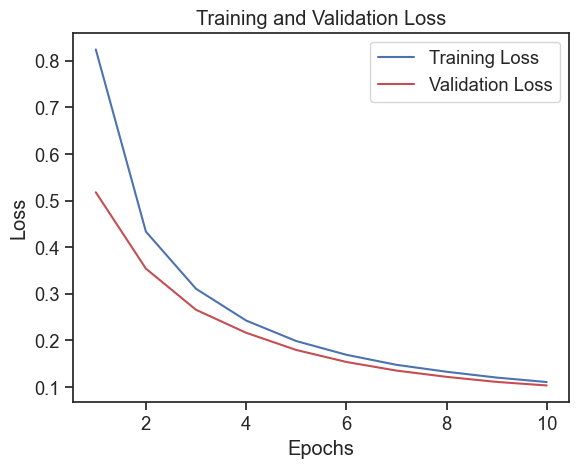

In [13]:
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score,recall_score,f1_score

# Determine the input dimension based on the shape of x_train
input_dim = x_train.shape[1]

# Define the neural network architecture with regularization
model1 = keras.Sequential([
    keras.layers.Dense(32, activation= 'relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001), input_shape=(input_dim,)),
    keras.layers.Dense(32, activation= 'relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)),
    keras.layers.Dense(32, activation= 'relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)),
    keras.layers.Dense(32, activation= 'relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)),
    keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model1.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Train the model
history1 = model1.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_val, y_val))

# Evaluate the model on the testing set
val_loss, val_acc1 = model1.evaluate(x_val,y_val)
train_loss1 = model1.evaluate(x_train, y_train)
y_pred = (model1.predict(x_val)>0.5).astype(int)
precision = precision_score(y_val,y_pred)
recall = recall_score(y_val,y_pred)
f1 = f1_score(y_val,y_pred)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Trianing loss: ', train_loss1)
print('Validation loss: ', val_loss)
print('Validation accuracy: ', val_acc1*100)

# plot the training and validation loss curve
train_loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
epochs1 = range(1,len(train_loss1)+1)

plt.plot(epochs1,train_loss1,'b',label='Training Loss')
plt.plot(epochs1, val_loss1,'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Network Architecture 1 in Figure

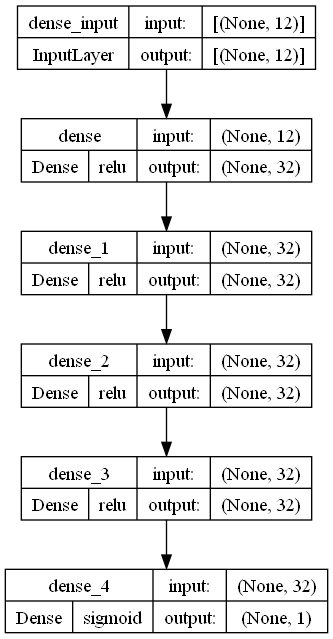

In [14]:
import graphviz
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf.keras.utils.plot_model(
model1,
to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

##### Architechture 2(Deep and Broad)

Epoch 1/10
122/122 [==============================] - 2s 7ms/step - loss: 4.6331 - accuracy: 0.9782 - val_loss: 0.4151 - val_accuracy: 0.9931
Epoch 2/10
122/122 [==============================] - 1s 7ms/step - loss: 0.2793 - accuracy: 0.9941 - val_loss: 0.2094 - val_accuracy: 0.9938
Epoch 3/10
122/122 [==============================] - 1s 8ms/step - loss: 0.1922 - accuracy: 0.9941 - val_loss: 0.1632 - val_accuracy: 0.9946
Epoch 4/10
122/122 [==============================] - 1s 8ms/step - loss: 0.1629 - accuracy: 0.9920 - val_loss: 0.1470 - val_accuracy: 0.9954
Epoch 5/10
122/122 [==============================] - 1s 8ms/step - loss: 0.1462 - accuracy: 0.9928 - val_loss: 0.1378 - val_accuracy: 0.9946
Epoch 6/10
122/122 [==============================] - 1s 9ms/step - loss: 0.1369 - accuracy: 0.9946 - val_loss: 0.1268 - val_accuracy: 0.9938
Epoch 7/10
122/122 [==============================] - 1s 7ms/step - loss: 0.1284 - accuracy: 0.9944 - val_loss: 0.1172 - val_accuracy: 0.9954
Epoch 

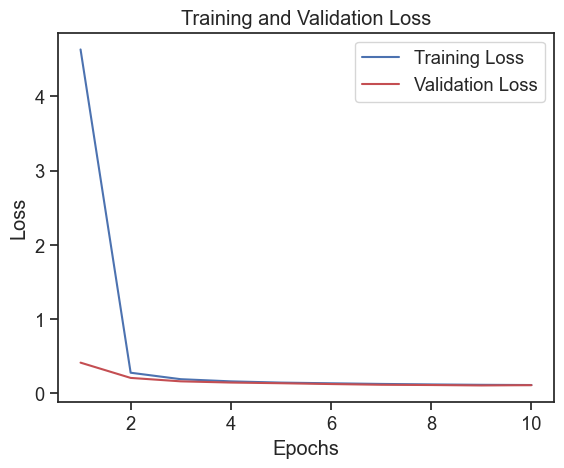

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Determine the input dimension based on the shape of x_train
input_dim = x_train.shape[1]

# Define the neural network architecture
model2 = keras.Sequential([
    keras.layers.Dense(512, activation= 'relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001), input_shape=(input_dim,)),
    keras.layers.Dense(256, activation= 'relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)),
    keras.layers.Dense(256, activation= 'relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)),
    keras.layers.Dense(256, activation= 'relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)),
    keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model2.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Train the model
history2 = model2.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_val, y_val))

# Evaluate the model on the testing set
val_loss, val_acc2 = model2.evaluate(x_val,y_val)
train_loss2 = model2.evaluate(x_train, y_train)
y_pred = (model2.predict(x_val)>0.5).astype(int)
precision = precision_score(y_val,y_pred)
recall = recall_score(y_val,y_pred)
f1 = f1_score(y_val,y_pred)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Train loss: ', train_loss2)
print('Validation loss: ', val_loss*100)
print('Validation accuracy: ', val_acc2*100)

# plot the training and validation loss curve
train_loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs2 = range(1,len(train_loss2)+1)

plt.plot(epochs2,train_loss2,'b',label='Training Loss')
plt.plot(epochs2, val_loss2,'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Network Architecture 2 in Figure

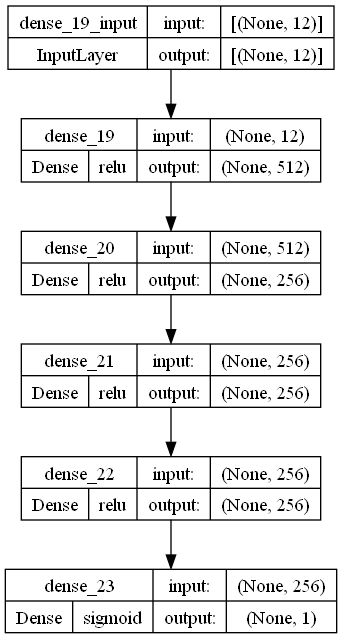

In [25]:
import graphviz
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf.keras.utils.plot_model(
model2,
to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

##### Architecture 3(Shallow and Narrow)

Epoch 1/10
122/122 [==============================] - 1s 4ms/step - loss: 0.5144 - accuracy: 0.9512 - val_loss: 0.3259 - val_accuracy: 0.9854
Epoch 2/10
122/122 [==============================] - 0s 3ms/step - loss: 0.2813 - accuracy: 0.9910 - val_loss: 0.2411 - val_accuracy: 0.9915
Epoch 3/10
122/122 [==============================] - 0s 3ms/step - loss: 0.2189 - accuracy: 0.9928 - val_loss: 0.1931 - val_accuracy: 0.9915
Epoch 4/10
122/122 [==============================] - 0s 3ms/step - loss: 0.1784 - accuracy: 0.9941 - val_loss: 0.1598 - val_accuracy: 0.9923
Epoch 5/10
122/122 [==============================] - 0s 3ms/step - loss: 0.1496 - accuracy: 0.9944 - val_loss: 0.1340 - val_accuracy: 0.9946
Epoch 6/10
122/122 [==============================] - 0s 3ms/step - loss: 0.1278 - accuracy: 0.9941 - val_loss: 0.1150 - val_accuracy: 0.9946
Epoch 7/10
122/122 [==============================] - 0s 3ms/step - loss: 0.1120 - accuracy: 0.9946 - val_loss: 0.1018 - val_accuracy: 0.9946
Epoch 

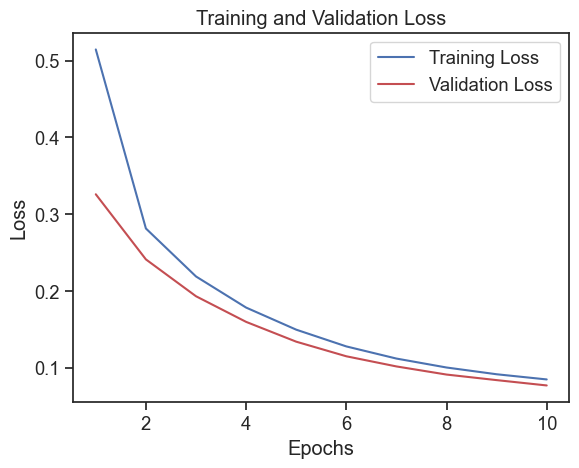

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Determine the input dimension based on the shape of x_train
input_dim = x_train.shape[1]

# Define the neural network architecture
model3 = keras.Sequential([
    keras.layers.Dense(32, activation= 'relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001), input_shape=(input_dim,)),
    keras.layers.Dense(32, activation= 'relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)),
    keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model3.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Train the model
history3 = model3.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_val, y_val))

# Evaluate the model on the testing set
val_loss, val_acc3 = model3.evaluate(x_val,y_val)
train_loss3 = model3.evaluate(x_train, y_train)
y_pred = (model3.predict(x_val)>0.5).astype(int)
precision = precision_score(y_val,y_pred)
recall = recall_score(y_val,y_pred)
f1 = f1_score(y_val,y_pred)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Training loss: ', train_loss3)
print('Validation loss: ', val_loss)
print('Validation accuracy: ', val_acc3*100)

# plot the training and validation loss curve
train_loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
epochs3 = range(1,len(train_loss3)+1)

plt.plot(epochs3,train_loss3,'b',label='Training Loss')
plt.plot(epochs3, val_loss3,'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Network Architecture 3 in Figure

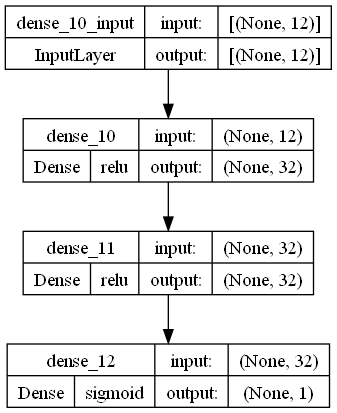

In [18]:
import graphviz
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf.keras.utils.plot_model(
model3,
to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

##### Architecture 4(Shallow and broad)

Epoch 1/10
122/122 [==============================] - 1s 4ms/step - loss: 1.0909 - accuracy: 0.9856 - val_loss: 0.5115 - val_accuracy: 0.9923
Epoch 2/10
122/122 [==============================] - 0s 3ms/step - loss: 0.3189 - accuracy: 0.9920 - val_loss: 0.2059 - val_accuracy: 0.9931
Epoch 3/10
122/122 [==============================] - 0s 3ms/step - loss: 0.1716 - accuracy: 0.9936 - val_loss: 0.1369 - val_accuracy: 0.9946
Epoch 4/10
122/122 [==============================] - 0s 2ms/step - loss: 0.1257 - accuracy: 0.9938 - val_loss: 0.1065 - val_accuracy: 0.9946
Epoch 5/10
122/122 [==============================] - 0s 3ms/step - loss: 0.1045 - accuracy: 0.9923 - val_loss: 0.0892 - val_accuracy: 0.9946
Epoch 6/10
122/122 [==============================] - 0s 3ms/step - loss: 0.0907 - accuracy: 0.9936 - val_loss: 0.0789 - val_accuracy: 0.9938
Epoch 7/10
122/122 [==============================] - 0s 4ms/step - loss: 0.0830 - accuracy: 0.9936 - val_loss: 0.0747 - val_accuracy: 0.9938
Epoch 

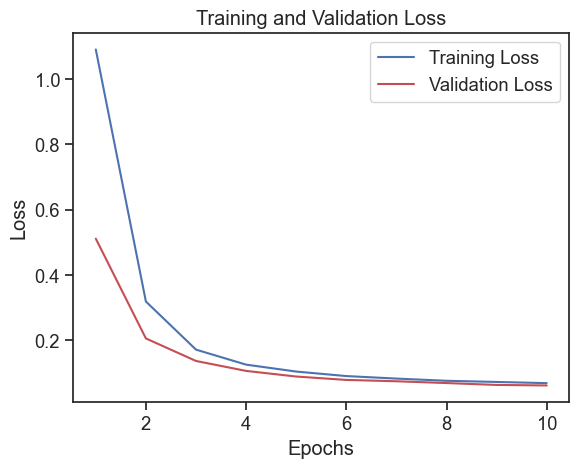

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Determine the input dimension based on the shape of x_train
input_dim = x_train.shape[1]

# Define the neural network architecture
model4 = keras.Sequential([
    keras.layers.Dense(128, activation= 'relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)),
    keras.layers.Dense(128, activation= 'relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)),
    keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model4.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Train the model
history4 = model4.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_val, y_val))

# Evaluate the model on the testing set
val_loss, val_acc4 = model4.evaluate(x_val,y_val)
train_loss4 = model4.evaluate(x_train, y_train)
y_pred = (model4.predict(x_val)>0.5).astype(int)
precision = precision_score(y_val,y_pred)
recall = recall_score(y_val,y_pred)
f1 = f1_score(y_val,y_pred)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Training loss: ', train_loss4)
print('Validation loss: ', val_loss*100)
print('Validation accuracy: ', val_acc4*100)

# plot the training and validation loss curve
train_loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']
epochs4 = range(1,len(train_loss4)+1)

plt.plot(epochs4,train_loss4,'b',label='Training Loss')
plt.plot(epochs4, val_loss4,'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Network Architecture 4 in Figure

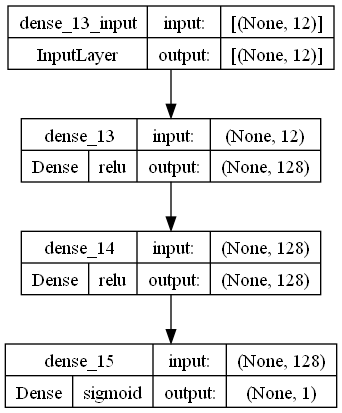

In [20]:
import graphviz
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf.keras.utils.plot_model(
model4,
to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

##### Architechture 5

Epoch 1/10
122/122 [==============================] - 1s 4ms/step - loss: 0.4630 - accuracy: 0.8915 - val_loss: 0.2768 - val_accuracy: 0.9638
Epoch 2/10
122/122 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9818 - val_loss: 0.1688 - val_accuracy: 0.9846
Epoch 3/10
122/122 [==============================] - 0s 3ms/step - loss: 0.1521 - accuracy: 0.9869 - val_loss: 0.1400 - val_accuracy: 0.9885
Epoch 4/10
122/122 [==============================] - 0s 3ms/step - loss: 0.1333 - accuracy: 0.9908 - val_loss: 0.1254 - val_accuracy: 0.9908
Epoch 5/10
122/122 [==============================] - 0s 4ms/step - loss: 0.1212 - accuracy: 0.9928 - val_loss: 0.1143 - val_accuracy: 0.9923
Epoch 6/10
122/122 [==============================] - 0s 3ms/step - loss: 0.1114 - accuracy: 0.9936 - val_loss: 0.1051 - val_accuracy: 0.9923
Epoch 7/10
122/122 [==============================] - 0s 3ms/step - loss: 0.1030 - accuracy: 0.9946 - val_loss: 0.0978 - val_accuracy: 0.9938
Epoch 

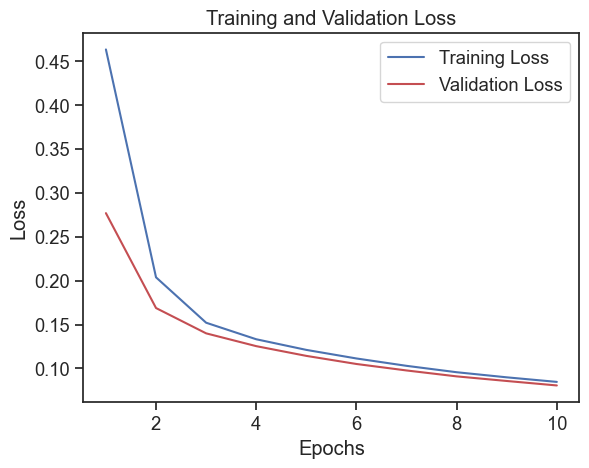

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras import regularizers

# Determine the input dimension based on the shape of x_train
input_dim = x_train.shape[1]

# Define the neural network architecture
model5 = keras.Sequential([
    keras.layers.Dense(16, activation= 'relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001), input_shape=(input_dim,)),
    keras.layers.Dense(8, activation= 'relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)),
    keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model5.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Train the model
history5 = model5.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_val, y_val))

# Evaluate the model on the testing set
val_loss, val_acc5 = model5.evaluate(x_val,y_val)
y_pred = (model5.predict(x_val)>0.5).astype(int)
train_loss5 = model5.evaluate(x_train, y_train)
precision = precision_score(y_val,y_pred)
recall = recall_score(y_val,y_pred)
f1 = f1_score(y_val,y_pred)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Training Loss: ', train_loss5)
print('Validation loss: ', val_loss*100)
print('Validation accuracy: ', val_acc5*100)

# plot the training and validation loss curve
train_loss5= history5.history['loss']
val_loss5 = history5.history['val_loss']
epochs5 = range(1,len(train_loss5)+1)

plt.plot(epochs5,train_loss5,'b',label='Training Loss')
plt.plot(epochs5, val_loss5,'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Network Architecture 5 in Figure

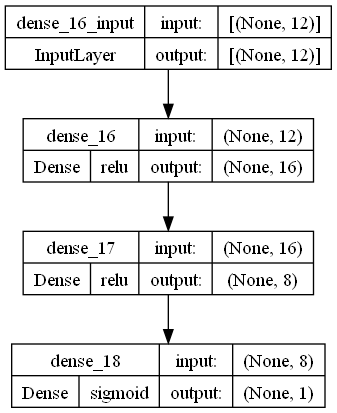

In [22]:
import graphviz
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf.keras.utils.plot_model(
model5,
to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

##### Model Selection

In [26]:
import array

# Compare the model with validation accuracy
best_val_accuracy = [val_acc1,val_acc2,val_acc3,val_acc4,val_acc5]

highest_value = best_val_accuracy[0]

#Loop through the array and update the highest value
for num in best_val_accuracy:
    if num > highest_value:
        highest_value = num

#Print the highest value
if highest_value == val_acc1:
    print('Model 1 is the best architecture with the accuracy of ',val_acc1*100)
elif highest_value == val_acc2:
    print('Model 2 is the best architecture with the accuracy of',val_acc2*100)
elif highest_value == val_acc3:
    print('Model 3 is the best architecture with the accuracy of ',val_acc3*100)
elif highest_value == val_acc4:
    print('Model 4 is the best architecture with the accuracy of ',val_acc4*100)
elif highest_value == val_acc5:
    print('Model 5 is the best architecture with the accuracy of ',val_acc5*100)

Model 1 is the best architecture with the accuracy of  99.4615375995636




Model 1 Deep and Narrow architecture is choosen.

1. High Accuracy: The model achieves a the highest accuracy on the validation set among the other architecture, indicating that it can effectively classify the data.

2. Low Loss: The model achieves a low validation loss, which indicates that it has learned to make predictions with minimal error.

3. Precision, Recall, and F1 Score: The model achieved high precision, recall, and F1 score on the validation set and indicate the model's ability to correctly classify positive and negative instances. 

4. Consistent Performance: The model's performance on the training set and validation set is comparable, indicating that it is not overfitting to the training data. This suggests that the model has learned generalizable patterns from the data and can perform well on unseen examples.


##### Model Tuning for Architecture 1

In [75]:
import warnings
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras
from tensorflow.keras import regularizers
from sklearn.metrics import make_scorer, f1_score

# Ignore all warnings
warnings.filterwarnings("ignore")

# Define a function to create the model
def create_model(neurons=32,activation='relu',learning_rate=0.001,alpha=0.001):
    model = keras.Sequential([
        keras.layers.Dense(neurons,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),input_shape=(input_dim,)),
        keras.layers.Dense(neurons,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)),
        keras.layers.Dense(neurons,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)),
        keras.layers.Dense(neurons,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)),
        keras.layers.Dense(1,activation='sigmoid')
    ])

    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

#Wrap the Keras model in a Sckit-learn compatible classifier
model = KerasClassifier(build_fn=create_model,verbose=0)

#Defind the hyperparameters and their range of values
param_grid={
    'batch_size' :[32,64,128],
    'epochs' :[10,20,30],
    'learning_rate':[0.001,0.01,0.1],
    'activation' : ['relu', 'sigmoid'],
    'alpha' : [0.001,0.01,0.1]

}

# Define the evaluation metrix
scoring = {'f1_score':make_scorer(f1_score)}

#Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,refit='f1_score',cv=3)
grid_result =grid_search.fit(x_train,y_train)

#Print the best hyperparameters and thir correspinding F1 score
print("Best parameters:", grid_result.best_params_)
print("Best F1 Score: ",grid_result.best_score_)

41/41 [==============================] - 0s 1ms/step
Best parameters: {'activation': 'relu', 'alpha': 0.1, 'batch_size': 32, 'epochs': 30, 'learning_rate': 0.1}
Best F1 Score:  0.9918385012527505


In [78]:
# Extract the results and sort them by mean test score in descending order
results = pd.DataFrame(grid_result.cv_results_)
results = results[['param_batch_size', 'param_epochs', 'param_learning_rate', 'param_activation','param_alpha', 'mean_test_f1_score']]
results = results.rename(columns={'param_batch_size': 'Batch Size', 'param_epochs': 'Epochs',
                                  'param_learning_rate': 'Learning Rate', 'param_activation': 'Activation', 'param_alpha':'Alpha',
                                  'mean_test_f1_score': 'F1 Score'})
results = results.sort_values(by='F1 Score', ascending=False)

# Print the results in a table
print(results.to_string(index=False))

Batch Size Epochs Learning Rate Activation  Alpha  F1 Score
        32     30           0.1       relu    0.1  0.991839
        32     30           0.1    sigmoid  0.001  0.991838
       128     20           0.1    sigmoid   0.01  0.991832
        32     30         0.001    sigmoid  0.001  0.990805
        32     20           0.1    sigmoid  0.001  0.990803
        32     30          0.01    sigmoid    0.1  0.990790
        64     30           0.1    sigmoid   0.01  0.990790
        32     20          0.01    sigmoid    0.1  0.990790
        64     10         0.001    sigmoid   0.01  0.990739
       128     30         0.001    sigmoid    0.1  0.990725
        64     10         0.001    sigmoid  0.001  0.990691
        32     30         0.001       relu   0.01  0.990311
        32     30           0.1       relu   0.01  0.990260
        64     30          0.01    sigmoid   0.01  0.990252
        32     30         0.001       relu    0.1  0.990250
        32     30          0.01       re

##### Model Evaluation

41/41 [==============================] - 0s 889us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       959
           1       1.00      0.99      0.99       341

    accuracy                           1.00      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300

Confusion Matrix: 
[[958   1]
 [  5 336]]
Validation F1 Score:  0.9918385012527505
Testing F1 Score: 0.9911504424778762
Validation Accucary: 99.69230890274048
Testing Accuracy:  99.53846153846155


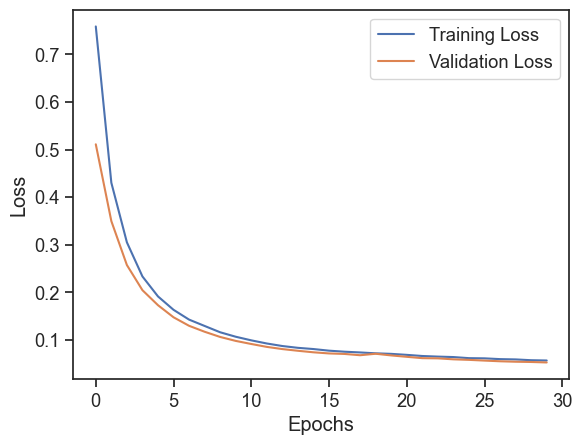

In [79]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

best_model = grid_result.best_estimator_
y_pred_test = best_model.predict(x_test)
test_f1_score = f1_score(y_test,y_pred_test)
test_accuracy = accuracy_score(y_test,y_pred_test)*100

print("Classification Report:")
print(classification_report(y_test,y_pred_test))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_test))

print("Validation F1 Score: ",grid_result.best_score_)
print("Testing F1 Score:", test_f1_score)

print("Validation Accucary:", grid_result.best_estimator_.score(x_val,y_val)*100)
print("Testing Accuracy: ", test_accuracy)

#Plot the training loss and validation loss
#Fit the best model and get the training history
history_best = best_model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=grid_result.best_params_['epochs'],batch_size=grid_result.best_params_['batch_size'],verbose=0)

plt.plot(history_best.history['loss'],label='Training Loss')
plt.plot(history_best.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### Report observation

- Based on the validation and testing results, the model achieved a high validation accuracy of and a slightly lower testing accuracy.

A high **validation accuracy** suggests that the model generalizes well to unseen data and performs well on the validation set. The slightly lower testing accuracy compared to the validation accuracy indicates that the model may have encountered some new patterns or variations in the testing data that were not present in the training and validation data.

- The **precesion** for class 0 and 1 are 0.99 and 1 respectively. This indicating that 99% and 100% of the instances predicted as class 0 and 1 are actual 0 and 1 respectively. Overall, the model has high precision for both class.

- The **Recall** for class 0 is is 1.00, indicating that the model correctly identifies all instances of class 0. While recall for class 1 is 0.99, indicating that the model correctly identifies 99% of the instances of class 1. The high recall values indicate that the model is effective in capturing the positive instances. 

- The **F1-Score** for class 0 is 0.99, and for class 1 is 1.00. The weighted average F1-score is 0.99 and 1.00, indicating good overall performance of the model in terms of both precision and recall.

- Based on **Confusion Matrix** it shows that 959 instances of class 0, the model correctly predicted 958 instances and misclassified 1 instances. While out of 341 instances of class 1, the model correctly predicted 336 instances and misclassified 5 instances.

* Overall the model demonstrates high accuract on both the validation and testing sets, indicating its effectiveness in predicting the target variable.

##### Extra note
-Lower loss values indicate that the model's predictions are closer to the true values,while higher loss values indicate larger discrepancies between predictions and true values.
-each iteration being called an epoch.
-Test loss and Test accuracy => result on the testing set
-model evaluation involves comparing the model's predictions on the testing set with the true labels, while model prediction involves obtaining the model's predictions on new, unseen data and optionally comparing them to the known target values, if available.
-ReLU (Rectified Linear Unit): ReLU is commonly used in hidden layers of deep neural networks. It introduces non-linearity to the network and helps address the vanishing gradient problem. ReLU is defined as f(x) = max(0, x), meaning it outputs the input value if it's positive, and zero otherwise. ReLU is computationally efficient and has been successful in many deep learning applications.

Sigmoid: The sigmoid activation function is commonly used in binary classification problems where the output should be between 0 and 1. It has a characteristic S-shaped curve and maps any real value to the range (0, 1). Sigmoid is defined as f(x) = 1 / (1 + exp(-x)). However, it can suffer from the vanishing gradient problem for deep networks and is generally not recommended for hidden layers in deep neural networks.

Tanh (Hyperbolic Tangent): Tanh is similar to the sigmoid function but maps the input to the range (-1, 1). It is useful in cases where the output should be symmetric around zero. Tanh is defined as f(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x)). Like sigmoid, it can suffer from the vanishing gradient problem for deep networks, so caution should be exercised when using it in deep architectures.

Softmax: Softmax is commonly used in multi-class classification problems. It generalizes the sigmoid function to multiple classes by normalizing the outputs such that they represent a probability distribution. Softmax is often used as the activation function in the output layer of a neural network when the task involves classifying multiple mutually exclusive classes. Softmax is defined as f(x) = exp(x) / sum(exp(x)), where the sum is taken over all classes.